In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load Dataset
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

raw_path = "/content/drive/MyDrive/Liver Patient Dataset (LPD)_train(1).csv"
df = pd.read_csv(raw_path, encoding="latin-1")

print("Initial Shape:", df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Initial Shape: (30691, 11)


In [ ]:
#Initial Inspection
df.info()
df.isnull().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


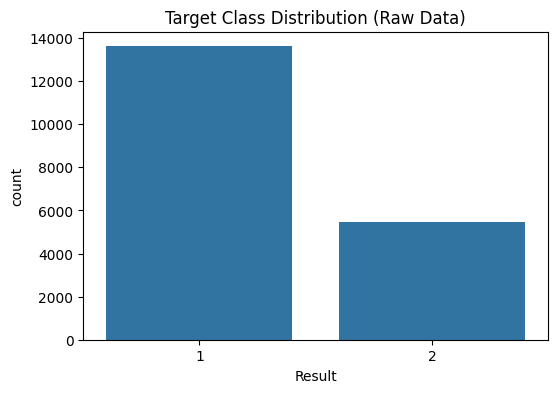

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Result", data=df)
plt.title("Target Class Distribution (Raw Data)")
plt.show()

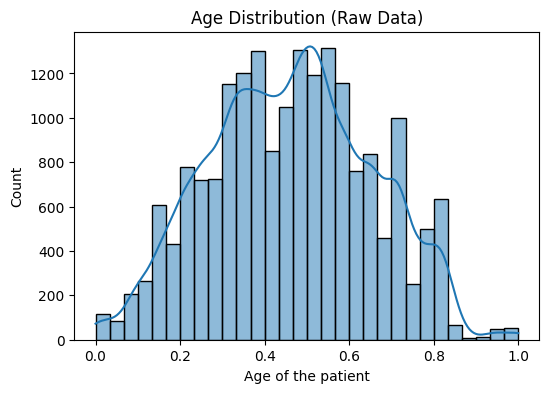

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age of the patient"], bins=30, kde=True)
plt.title("Age Distribution (Raw Data)")
plt.show()

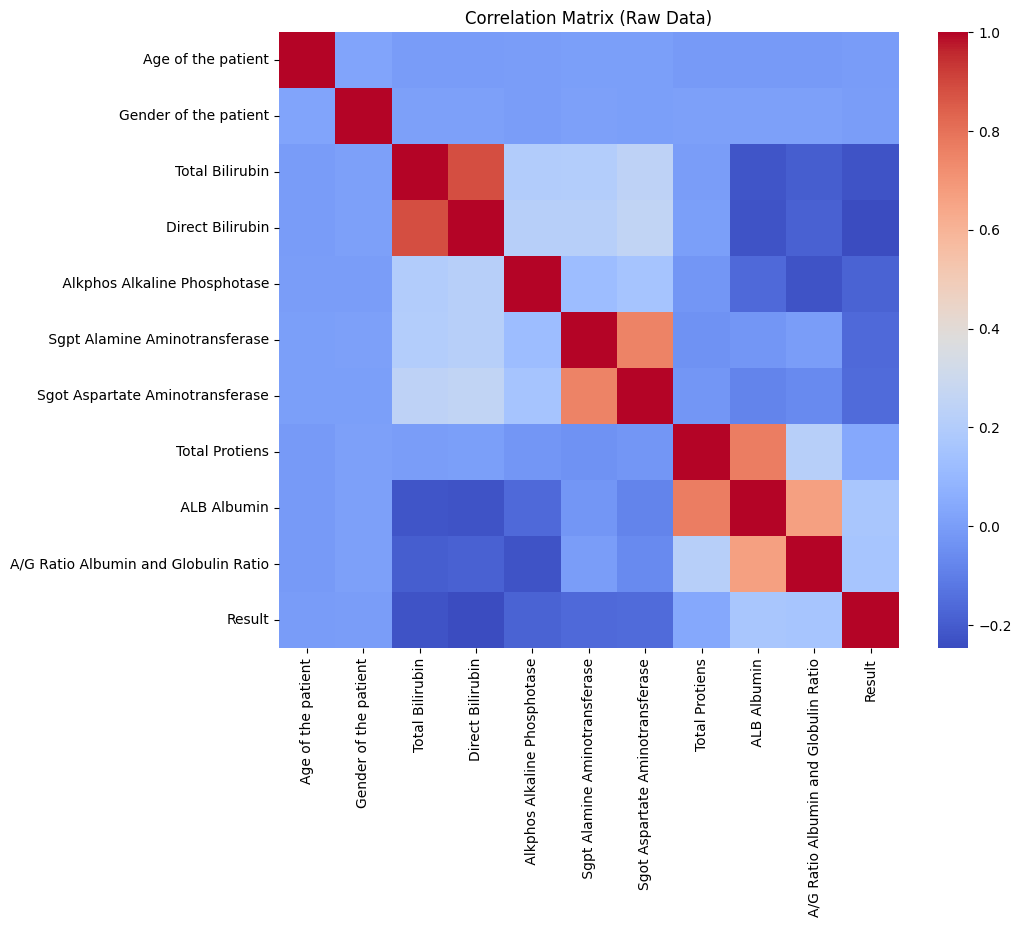

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Matrix (Raw Data)")
plt.show()

In [ ]:
#Missing Value Handling
df["Gender of the patient"] = df["Gender of the patient"].fillna(
    df["Gender of the patient"].mode()[0]
)

numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30691 non-null  float64
 1   Gender of the patient                 30691 non-null  object 
 2   Total Bilirubin                       30691 non-null  float64
 3   Direct Bilirubin                      30691 non-null  float64
 4    Alkphos Alkaline Phosphotase         30691 non-null  float64
 5    Sgpt Alamine Aminotransferase        30691 non-null  float64
 6   Sgot Aspartate Aminotransferase       30691 non-null  float64
 7   Total Protiens                        30691 non-null  float64
 8    ALB Albumin                          30691 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30691 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [ ]:
#Duplicate Removal
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

print("Duplicates removed:", before - after)

Duplicates removed: 11608


In [ ]:
# Encoding
df["Gender of the patient"] = df["Gender of the patient"].astype("category").cat.codes

/tmp/ipython-input-4062988839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender of the patient"] = df["Gender of the patient"].astype("category").cat.codes


In [ ]:
#Post-Cleaning Inspection
print(df.isnull().sum())
print(df.shape)

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64
(19083, 11)


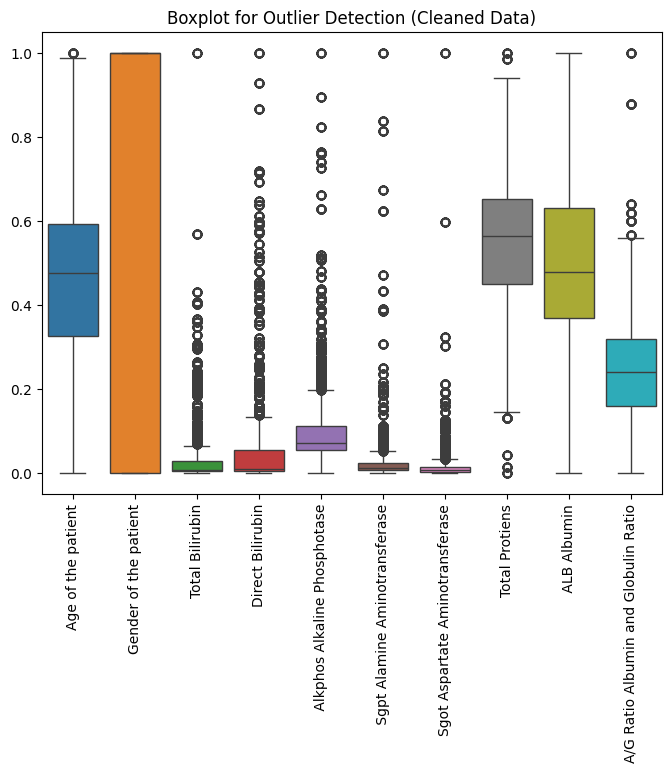

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df.drop(columns=["Result"]))
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection (Cleaned Data)")
plt.show()

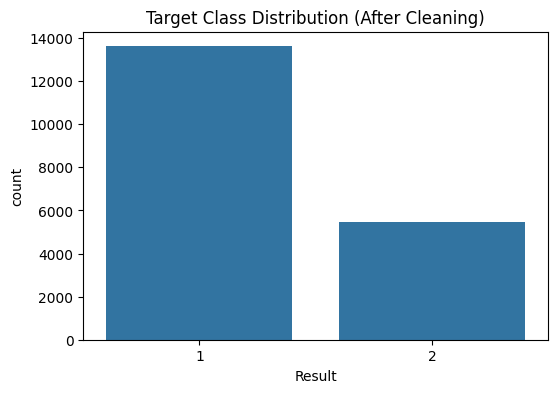

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Result", data=df)
plt.title("Target Class Distribution (After Cleaning)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Result", axis=1)
y = df["Result"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2722
           2       1.00      0.99      1.00      1095

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



In [ ]:
df.to_csv("cleaned_liver_data.csv", index=False)

In [ ]:
from google.colab import files
files.download("cleaned_liver_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>